In [54]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense , Conv2D , MaxPool2D , UpSampling2D

from keras import Sequential
from keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Datasets

In [26]:
(X_train , _) , (X_test , _) = mnist.load_data()

In [27]:
## Normalize the image data for the model

X_train = X_train.reshape(len(X_train) , 28 , 28 , 1)
X_test = X_test.reshape(len(X_test) , 28 , 28 , 1)
X_test.shape

(10000, 28, 28, 1)

In [28]:
model = Sequential([
    # Encoder Network
    Conv2D(32, 3, activation="relu", padding="same", input_shape=(28, 28, 1)),
    MaxPool2D(2, padding="same"),
    Conv2D(16, 3, activation="relu", padding="same"),
    MaxPool2D(2, padding="same"),
    # Decoder Network
    UpSampling2D(2),  
    Conv2D(16, 3, activation="relu", padding="same"),
    UpSampling2D(2),
    Conv2D(32, 3, activation="relu", padding="same"),
    # Output layer
    Conv2D(1, 3, padding="same", activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy")

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                      

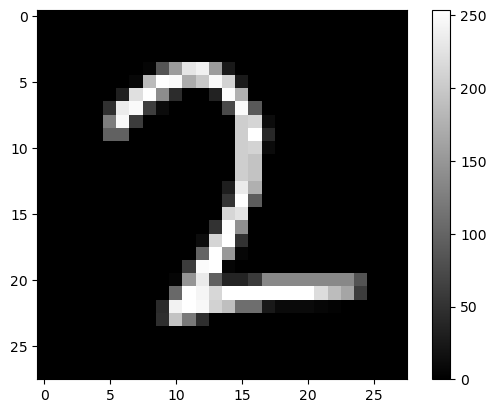

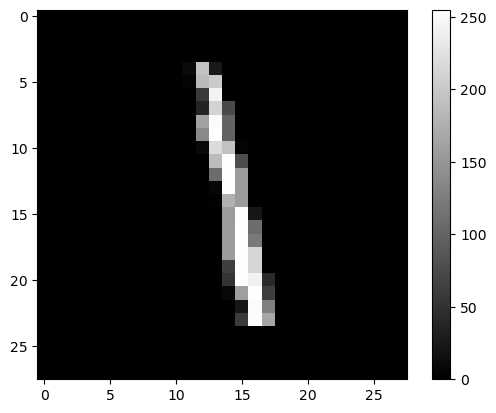

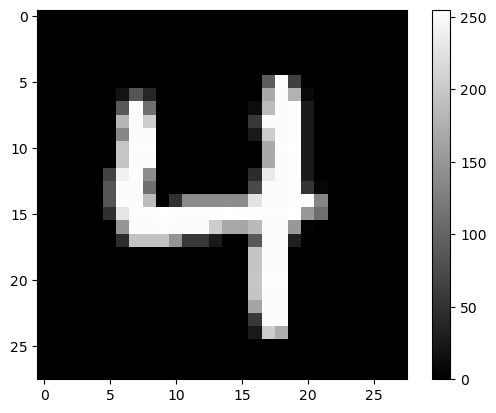

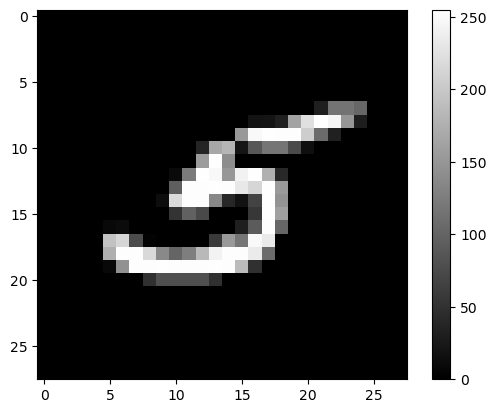

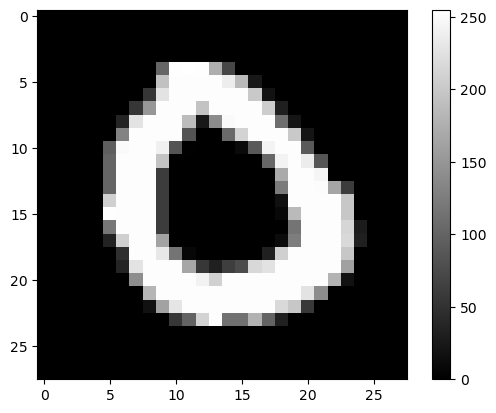

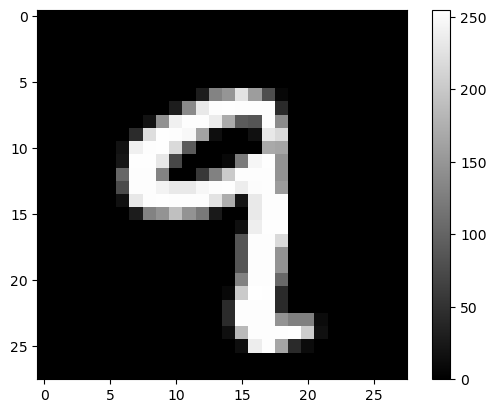

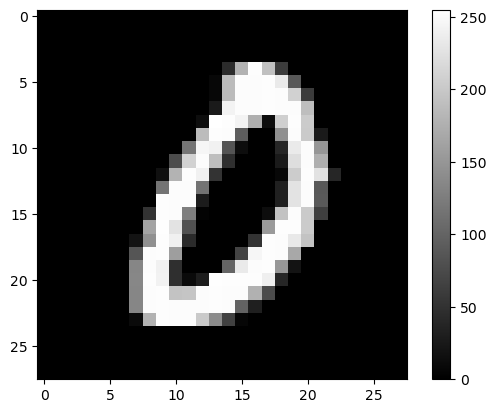

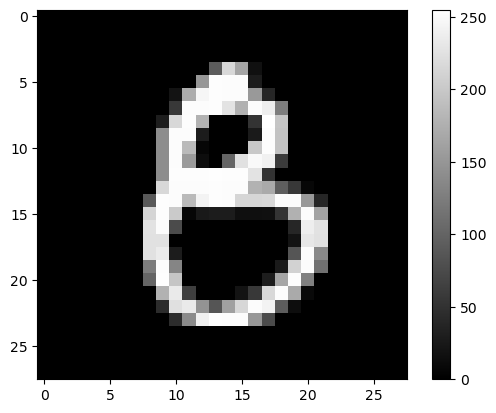

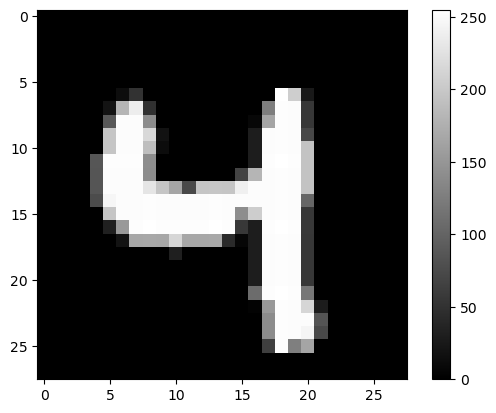

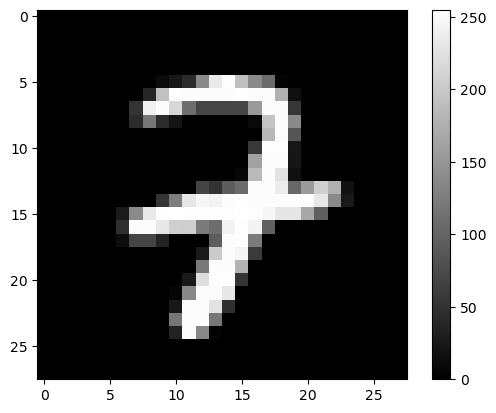

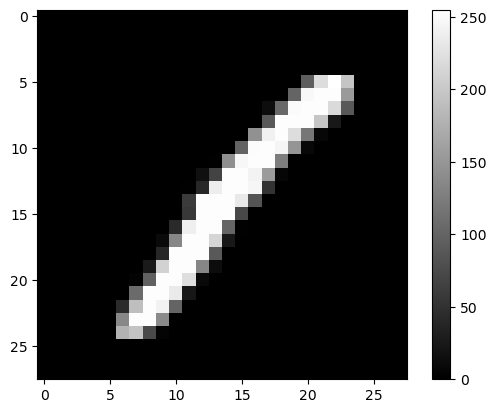

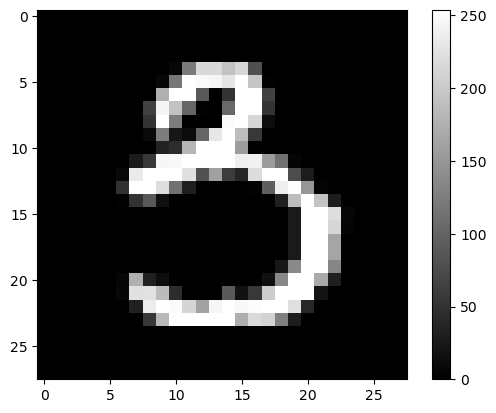

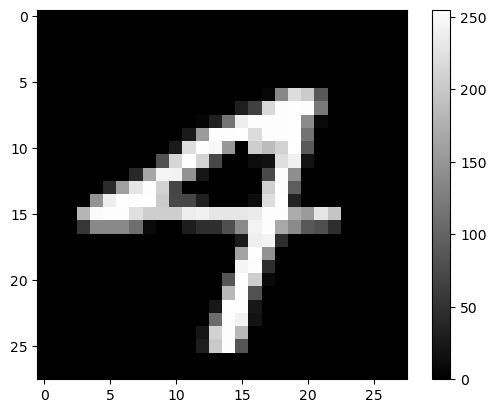

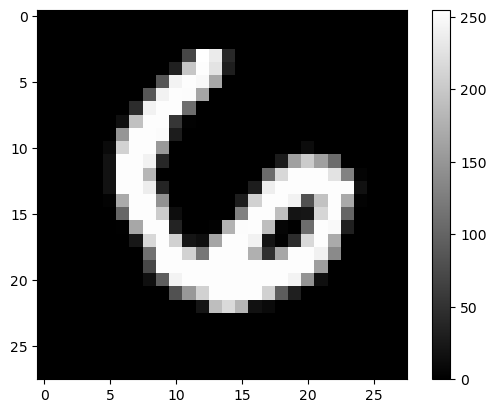

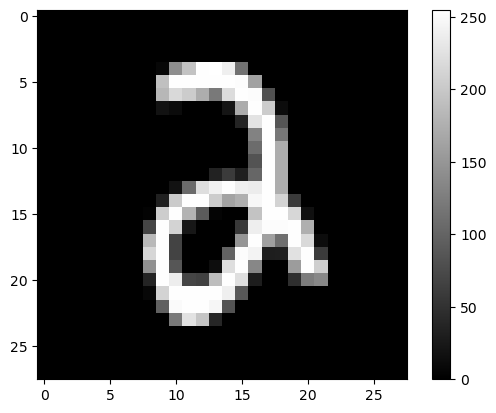

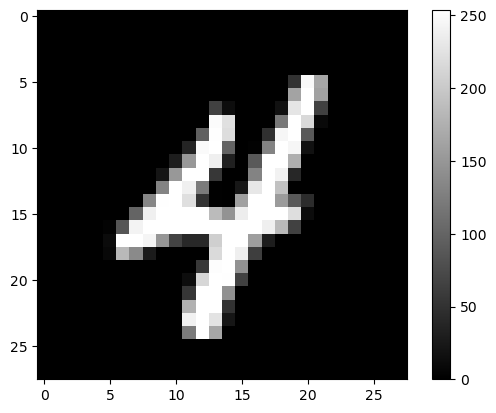

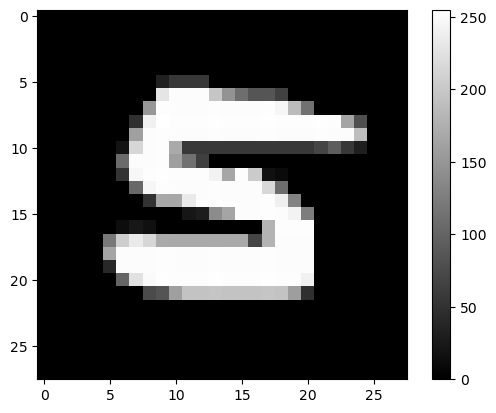

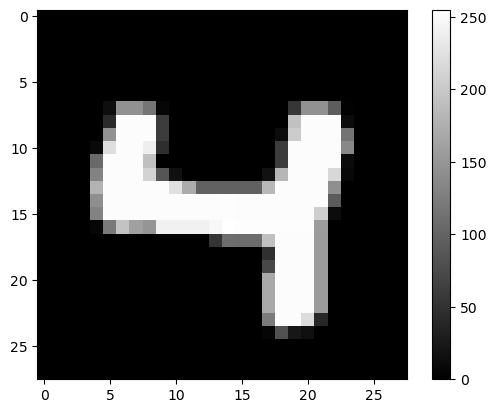

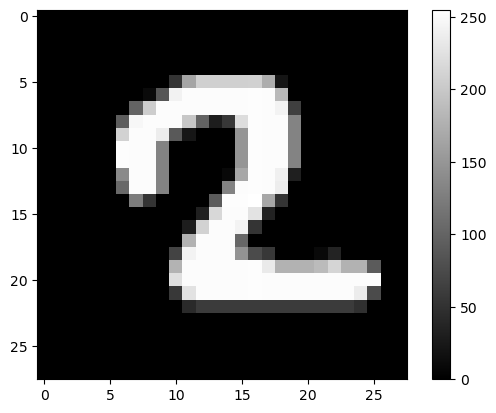

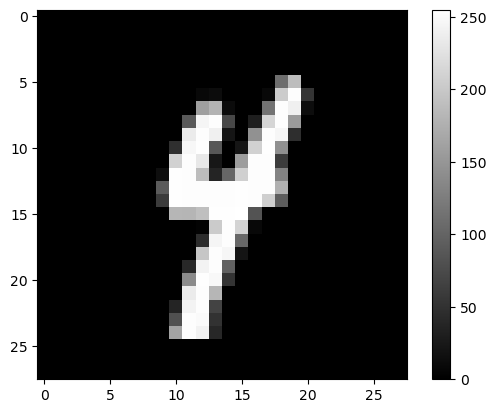

In [29]:

for i in range(20):
    # Select image random 
    index = np.random.randint(len(X_test))
    plt.imshow(X_test[index].reshape(28,28))
    plt.colorbar()
    plt.show()

In [47]:
history = model.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test))


Epoch 1/20
235/235 [==============================] - 22s 94ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 2/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0698 - val_loss: 0.0693
Epoch 3/20
235/235 [==============================] - 21s 91ms/step - loss: 0.0694 - val_loss: 0.0688
Epoch 4/20
235/235 [==============================] - 22s 93ms/step - loss: 0.0691 - val_loss: 0.0684
Epoch 5/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0688 - val_loss: 0.0682
Epoch 6/20
235/235 [==============================] - 27s 115ms/step - loss: 0.0686 - val_loss: 0.0680
Epoch 7/20
235/235 [==============================] - 30s 128ms/step - loss: 0.0684 - val_loss: 0.0678
Epoch 8/20
235/235 [==============================] - 29s 125ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 9/20
235/235 [==============================] - 28s 120ms/step - loss: 0.0680 - val_loss: 0.0675
Epoch 10/20
235/235 [==============================] - 28s 120ms/step - loss

## Visualize the results


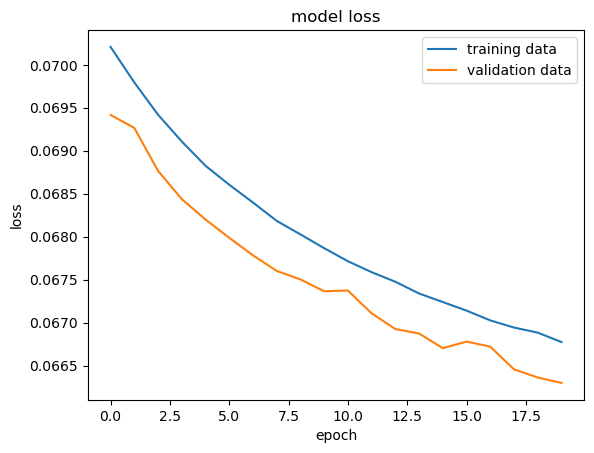

In [48]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [49]:
pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


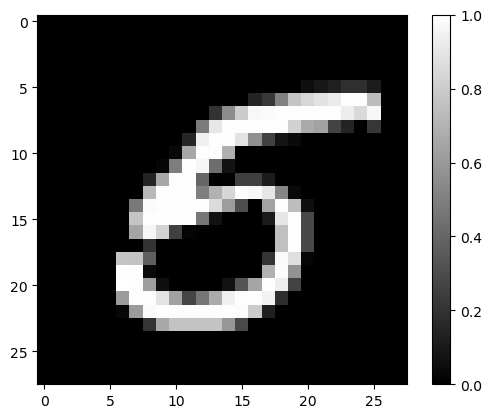

In [50]:
index = np.random.randint(len(X_test))
plt.imshow(X_test[index].reshape(28,28))
plt.colorbar()
plt.show()

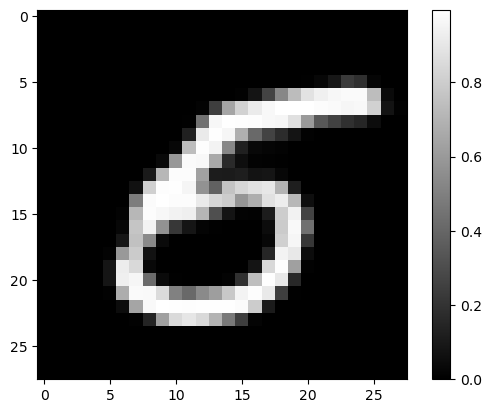

In [51]:
plt.imshow(pred[index].reshape(28,28))
plt.colorbar()
plt.show()

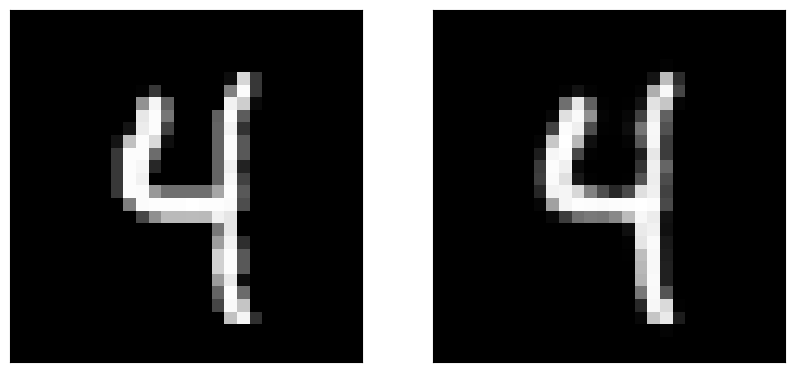

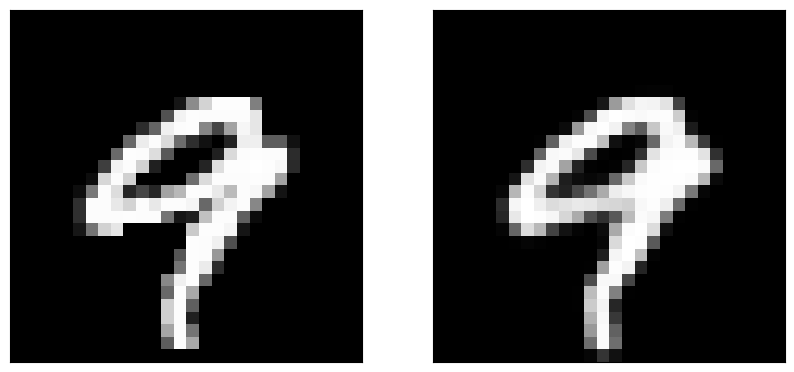

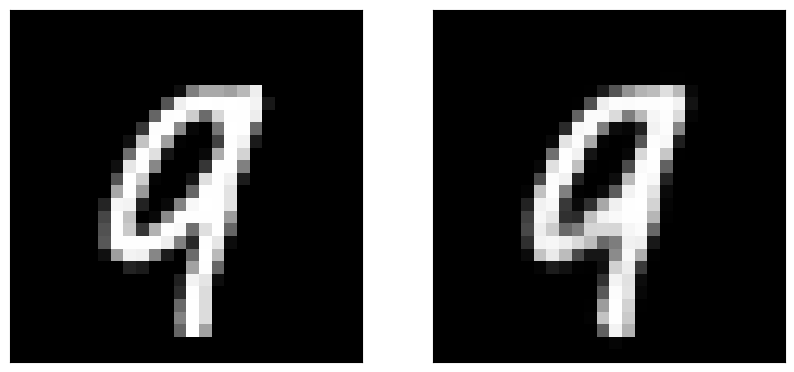

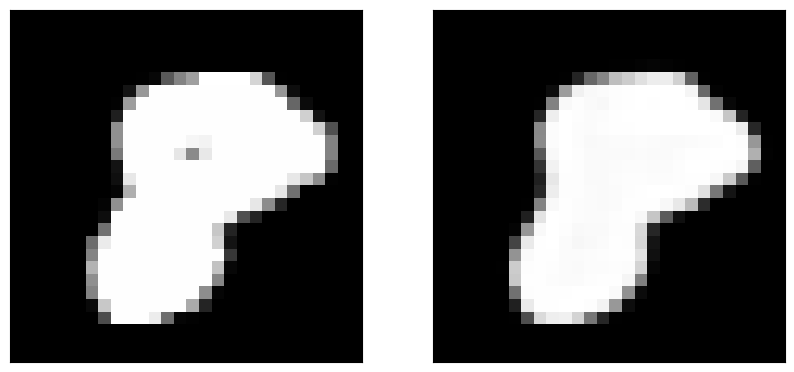

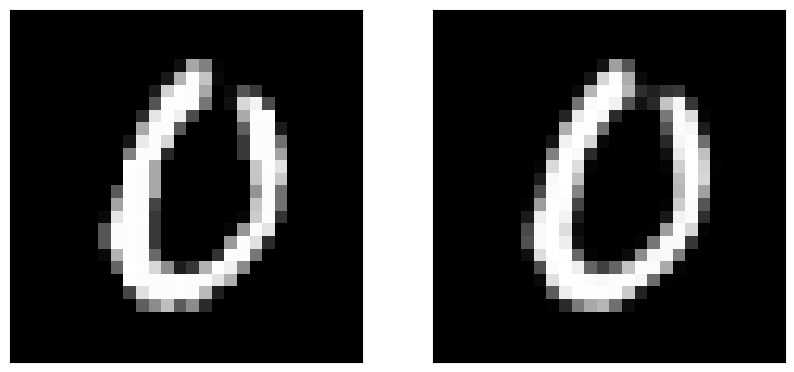

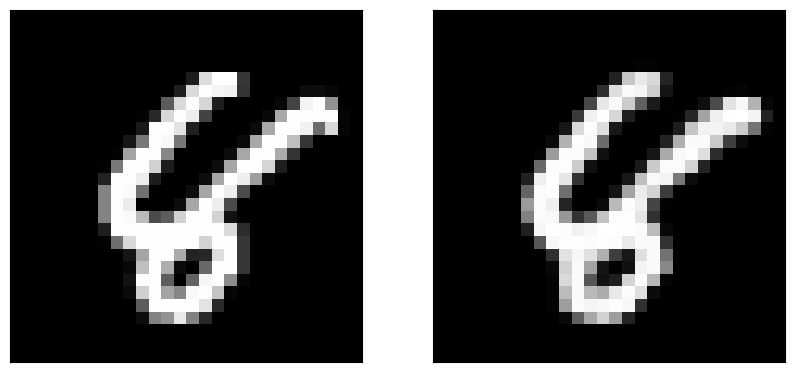

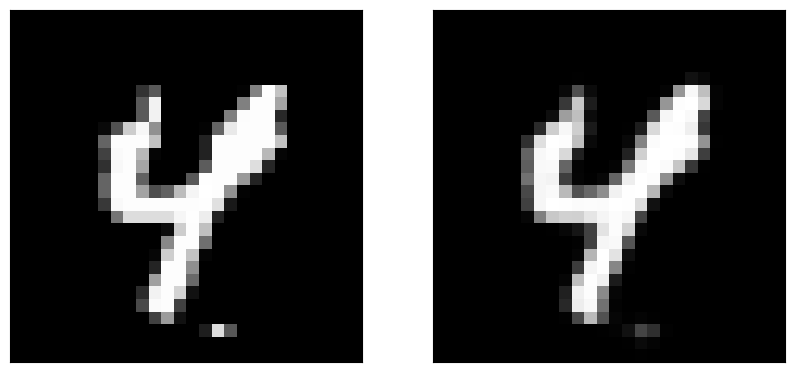

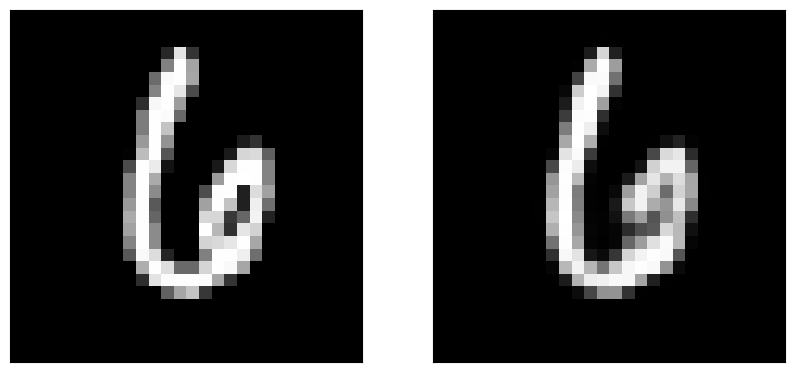

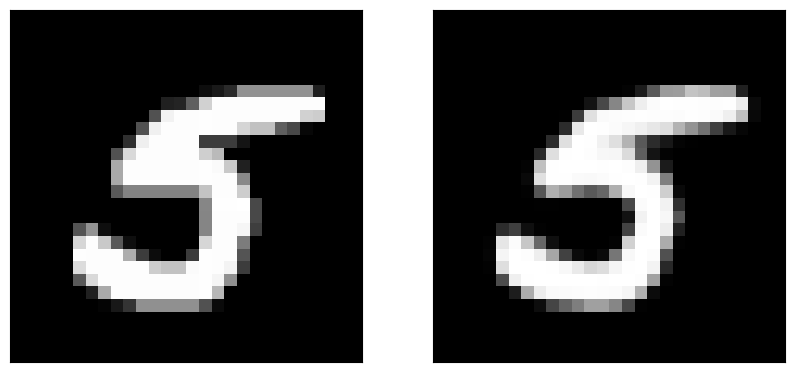

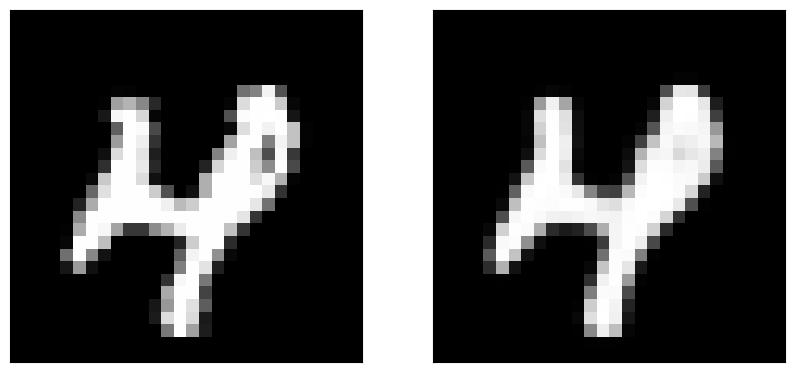

In [52]:

for i in range(10):
    index = np.random.randint(len(X_test))
    plt.figure(figsize=(10, 8))

    # Original image
    ax = plt.subplot(1, 2, 1)  
    plt.imshow(X_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed image
    ax = plt.subplot(1, 2, 2)  
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()


# End